# Первичный анализ и предобработка данных с Pandas

В этом задании рассмотрим первичный анализ данных на примере реальных данных по шоколадным батончикам. Данные содержат следующие атрибуты: 'company' - компания производитель, 'bar_name' - название шоколадного батончика, 'ref' - номер, 'rew_date' - дата оценки, 'percent' - процент какао бобов, 'company_loc' - местонахождение компании, 'rate' - рейтинг, 'bean_dtype' - тип какао бобов, 'bean_orig' - страна происхождения.

## Численные атрибуты

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
best_bar= pd.read_csv('flavors_of_cacao.csv',
                       sep=',', header=0, 
                      names=['company', 'bar_name','ref', 'rew_date', 'percent', 
                             'company_loc', 'rate', 'bean_dtype', 'bean_orig'])

In [3]:
type(best_bar)

pandas.core.frame.DataFrame

Оставим только только местонахождение компании, рейтинг, процент какао бобов и страну происхождения для дальнейшего анализа.

In [4]:
best_bar = best_bar[['company_loc', 'rate', 'percent', 'bean_orig']]
best_bar.head() 

,company_loc,rate,percent,bean_orig
0,France,3.75,63%,Sao Tome
1,France,2.75,70%,Togo
2,France,3.00,70%,Togo
3,France,3.50,70%,Togo
4,France,3.50,70%,Peru


Необходимо построить гистограмму распределения рейтинга батончика через plot(). Количество столбцов гистограммы равно 20.
На одном графике необходимо построить график плотности вероятности, который строится на основе оценки непрерывного распределения вероятности. Гистограммы аппроксимируют комбинацией ядре, т.е. более простых распределений, например нормалього (гауссова). Поэтому графики плотности еще называют ядерной окенки плотности (KDE-kernel density estimate). Строится kde с помощью функции плот с параметром kind='kde'.

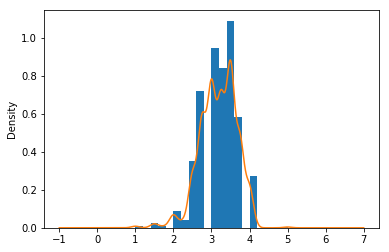

In [5]:
# bins - столбцы, density - сжатие
best_bar.rate.plot(kind='hist', bins=20, density=True)
best_bar.rate.plot(kind='kde')

Необходимо построить гистограмму распределения для процента какао бобов. Однако, следует отметить, что данные атрибут имеет тип object. Шистограмму для такого типа построить не получиться.

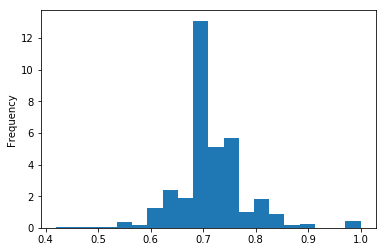

In [6]:
# best_bar.percent.dtype
best_bar.percent = best_bar.percent.str.replace('%','').astype('float').apply(lambda x: x / 100.0)
best_bar.percent.plot(kind='hist', bins=20, density=True)

Необходимо преобразовать данный тип в float с помощью функции apply. Причем сначала необходимо убрать знак '%' в конце каждого элемента, а затем преобразовать в тип данных с плавающей точкой. Функция apply проходит по всем значениям данных и применяет указанную функцию.

In [ ]:
# code here
# ̄\_()_/ ̄

Постройте scatter plot зависимости рейтинга батончика от процента какао бобов, используя метод plot для Pandas DataFrame с аргументом kind='scatter'. Подпишите картинку.

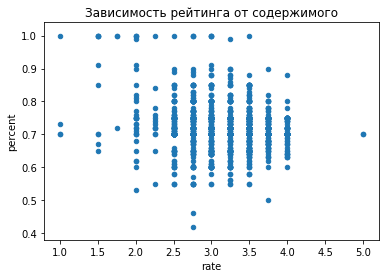

In [7]:
best_bar.plot(kind='scatter', x='rate', y='percent', title='Зависимость рейтинга от содержимого')

Постройте "ящик с усами" для числовых распределений с помощью функции boxplot. Возпользуйтесь также функцией describe() для каждого распределения.

,rate,percent
count,1795.000000,1795.000000
mean,3.185933,0.716983
std,0.478062,0.063231
min,1.000000,0.420000
25%,2.875000,0.700000
50%,3.250000,0.700000
75%,3.500000,0.750000
max,5.000000,1.000000


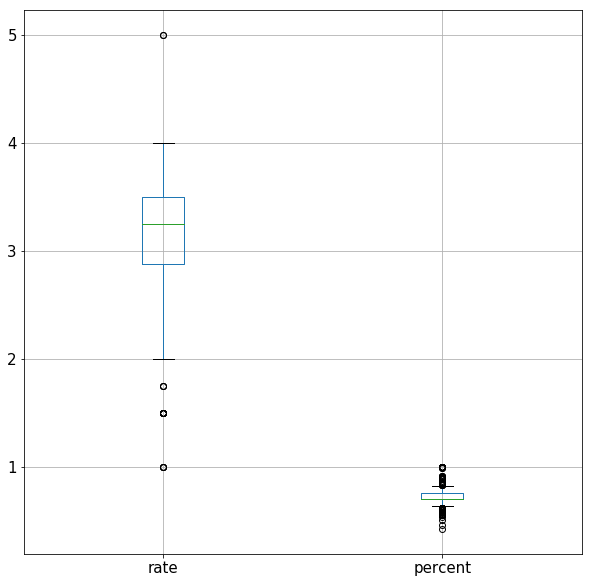

In [8]:
best_bar.boxplot(fontsize=15, figsize=(10,10))
best_bar.describe()

## Категориальные атрибуты

Обратим внимание на категориальные признаки. Построить гистограмму распределения не удасться, но в качестве начального анализа можно воспользоваться функцией value_counts, которая позволяет вывести количество встречающихся значений в атрибуте данных. Обратите внимание внимание на места происхождения бобов, которые редко встречаются в наборе данных. Для вывода начальных и конечных элементов используются функции head() и tail() соответственно.

In [9]:
best_bar.bean_orig.value_counts().head()

Venezuela             214
Ecuador               193
Peru                  165
Madagascar            145
Dominican Republic    141
Name: bean_orig, dtype: int64

In [10]:
best_bar.bean_orig.value_counts().tail()

Venezuela, Ghana                1
Venez,Africa,Brasil,Peru,Mex    1
PNG, Vanuatu, Mad               1
Ven., Trinidad, Mad.            1
Ghana & Madagascar              1
Name: bean_orig, dtype: int64

После того, как выведено количество уникальных значений можно представить их визуальное распределение с помощью функции plot(kind='bar').

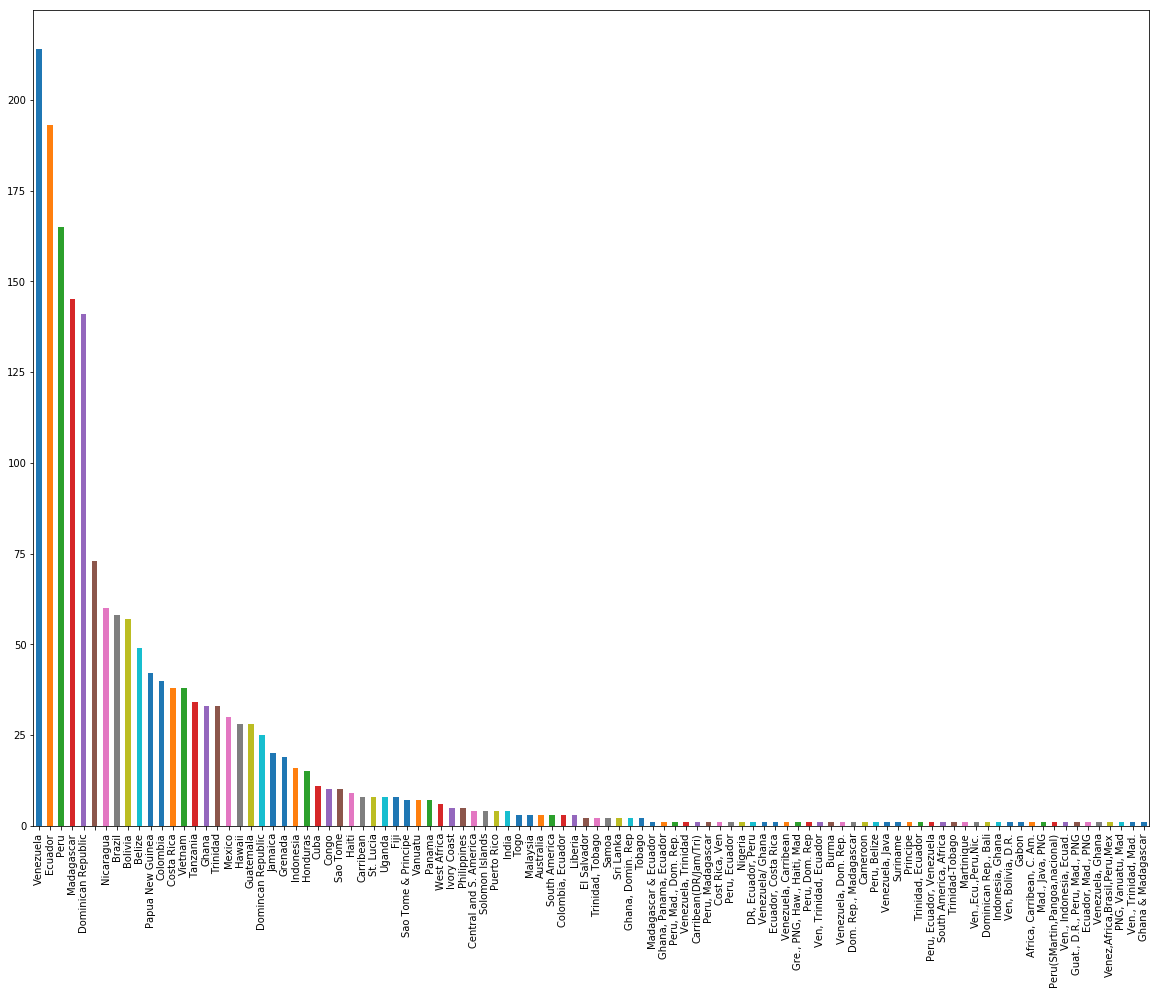

In [11]:
best_bar.bean_orig.value_counts().plot(kind='bar', figsize=(20,15))

По гистограмме распределения категориальных атрибутов о происхождения какао бобов можно увидеть, что присутствует хаос в данных. Для некоторых объектов названия мест происхождения написаны с ошибками, у некоторых объектов вообще отсутствует место происхождения, а так же есть батончики, состоящие из какао бобов из разных мест происхождения. В этой связи необходимо произвести предобработку данных для дальнейшего анализа.
Для начала убрать объекты с пропущенными записями, используя функцию dropna. Необходимо отметить, что в качестве параметров функции передается 'axis', где 0 - удалять по строкам (объектам), 1 - удалять по столбцам, 'how', где 'any' - удалять строку или столбец, если есть пустой объект, 'all' - удалять строку или столбец, если все объекты пустые.  

In [12]:
best_bar = best_bar.dropna().reset_index(drop=True)
best_bar.bean_orig.unique()

array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', '\xa0', 'Jamaica',
       'Grenada', 'Guatemala', 'Honduras', 'Costa Rica',
       'Domincan Republic', 'Haiti', 'Congo', 'Philippines', 'Malaysia',
       'Dominican Rep., Bali', 'Venez,Africa,Brasil,Peru,Mex', 'Gabon',
       'Ivory Coast', 'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda',
       'Martinique', 'Sao Tome & Principe', 'Vanuatu', 'Australia',
       'Liberia', 'Ecuador, Costa Rica', 'West Africa', 'Hawaii',
       'St. Lucia', 'Cost Rica, Ven', 'Peru, Madagascar',
       'Venezuela, Trinidad', 'Trinidad, Tobago',
       'Ven, Trinidad, Ecuador', 'South America, Africa', 'India',
       'Africa, Carribean, C. Am.', 'Tobago', 'Ven., Indonesia, Ecuad.',
       'Trinidad-Tobago

Заметим, что пустые записи из атрибута происхождения бобов не удалилсь. Значит "пустые" записи не являются пустыми. Выведите все уникальные значения атрибута 'bean_orig' с помощью функции unique() и найдите значение пустой записи.

In [13]:
# code here
# ̄\_()_/ ̄

Для того, чтобы исключить данный элемент, необходимо использовать слудующую конструкцию: best_bar['bean_orig'] != 'element value', которая вернет бинарный массив элементов, где True - атрибут объекта не принимает значение 'element value', False - атрибут объекта принимает значение 'element value'. Затем полученную бинарную матрицу передаем в качестве маски, по которой будут выбраны объекты из нашего массива данных.

In [14]:
best_bar = best_bar[best_bar.bean_orig != '\xa0'].reset_index(drop=True)
best_bar.tail()

,company_loc,rate,percent,bean_orig
1716,Austria,3.75,0.70,Peru
1717,Austria,3.00,0.65,Congo
1718,Austria,3.50,0.65,India
1719,Austria,3.25,0.62,India
1720,Austria,3.00,0.65,Brazil


Помимо этого необходимо решить проблему с батончиками из разных какао бобов. Лучшим способом является обработка и разделение этих составных бобов. Но на данном этапе, в виду их малого вклада, мы уберем их и сделаем одним видом сложного состава 'complex'. Будем считать редковстречающимися, если в выборке их не более 5.

In [15]:
def find_complex(words):
    if len(words) == 1:
        answer = words[0]
    else:
        answer = 'complex'
    return answer

best_bar.bean_orig = best_bar.bean_orig.str.split(',').apply(find_complex)
best_bar.bean_orig.unique()

array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', 'Jamaica', 'Grenada',
       'Guatemala', 'Honduras', 'Costa Rica', 'Domincan Republic',
       'Haiti', 'Congo', 'Philippines', 'Malaysia', 'complex', 'Gabon',
       'Ivory Coast', 'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda',
       'Martinique', 'Sao Tome & Principe', 'Vanuatu', 'Australia',
       'Liberia', 'West Africa', 'Hawaii', 'St. Lucia', 'India', 'Tobago',
       'Trinidad-Tobago', 'Solomon Islands', 'Nigeria', 'El Salvador',
       'South America', 'Samoa', 'Cameroon', 'Venezuela/ Ghana',
       'Principe', 'Central and S. America', 'Carribean(DR/Jam/Tri)',
       'Ghana & Madagascar', 'Madagascar & Ecuador', 'Suriname'],
      dtype=object)

Постройте круговую гистограмму распределения для стран происзводителей какао бобов с помощью функции pie().

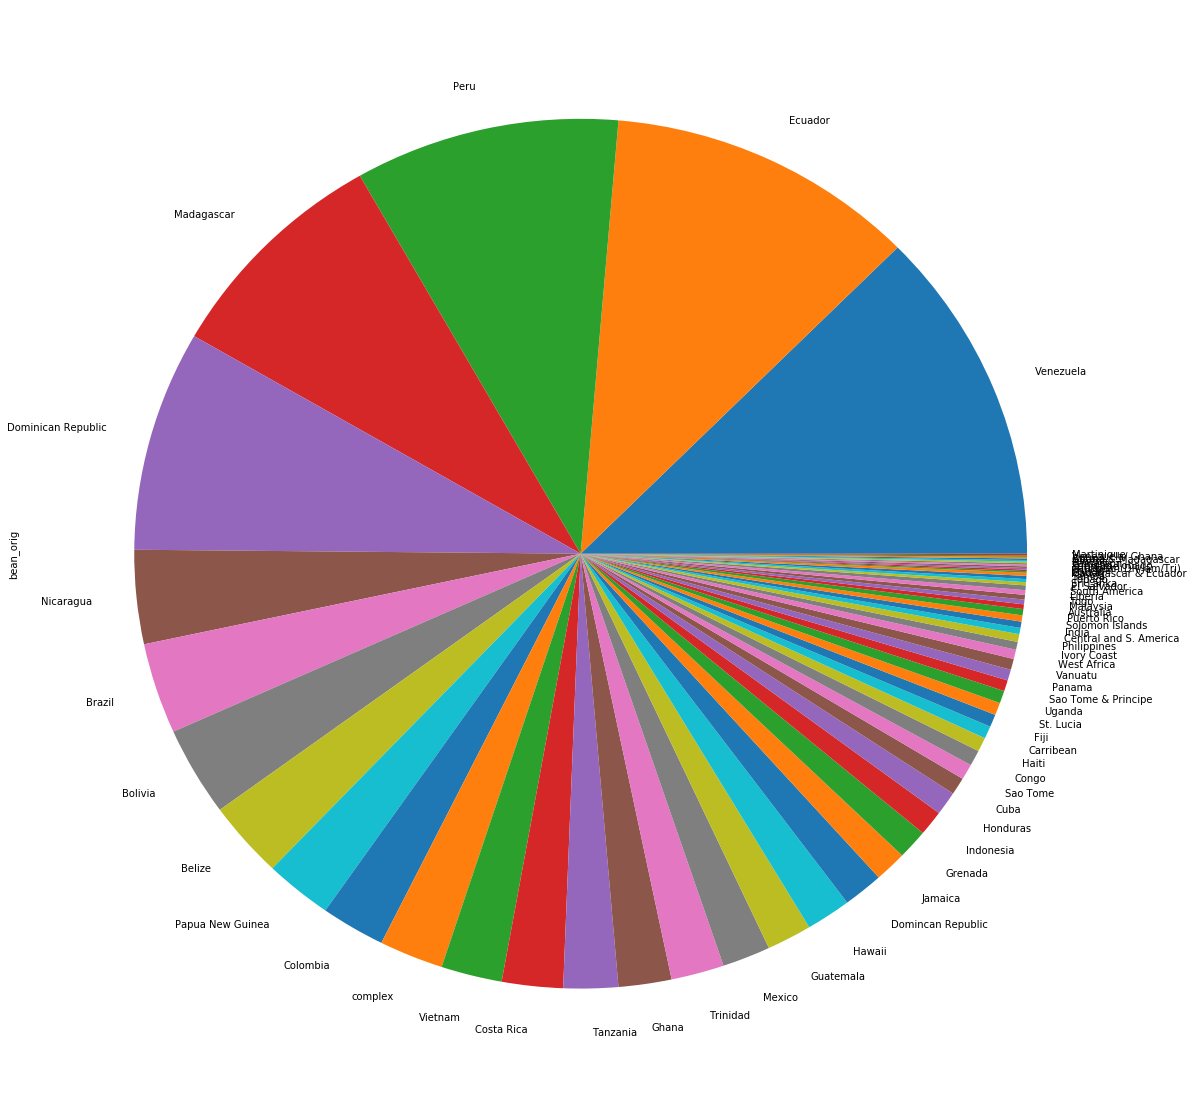

In [16]:
best_bar.bean_orig.value_counts().plot.pie(figsize=(20,20))

## Попарные графики распределений

In [17]:
from sklearn import preprocessing
from seaborn import pairplot

Построить попарные распределения для всех признаков.

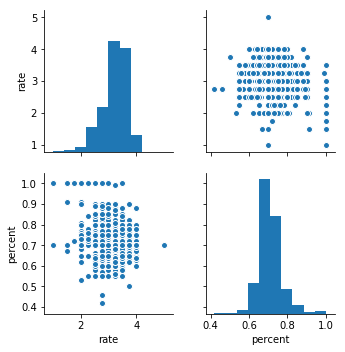

In [18]:
pairplot(best_bar)

Определите, где растут лучшие какао бобы, вычислив средний значение и медиану рейтинга батончика для каждого места происхождения. Напишите первую тройку лучших в обоих случаях.

In [24]:
best_bar.groupby(['bean_orig']).rate.mean().sort_values(ascending=False)[:3]

bean_orig
South America       3.666667
Tobago              3.625000
Venezuela/ Ghana    3.500000
Name: rate, dtype: float64

In [25]:
best_bar.groupby(['bean_orig']).rate.median().sort_values(ascending=False)[:3]

bean_orig
Tobago           3.625
South America    3.500
Honduras         3.500
Name: rate, dtype: float64

Определите, где производят лучшие батончики, вычислив средний значение и медиану рейтинга батончика для каждого места происхождения.